# 꿀가격 예측


In [1]:
import pandas as pd

h_df = pd.read_csv('../new/honey_purity_dataset.csv')
h_df

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [5]:
pre_h_df = h_df.copy()

In [12]:
pre_h_df.isna().sum()

CS           0
Density      0
WC           0
pH           0
EC           0
F            0
G            0
Viscosity    0
Purity       0
Price        0
dtype: int64

In [13]:
pre_h_df.duplicated().sum()

0

In [7]:
# 분류형 데이터 없이 확인 
pre_h_df = pre_h_df.drop(labels = ['Pollen_analysis'], axis = 1).reset_index(drop=True)
pre_h_df

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,4417.74,0.97,949.32


<Axes: >

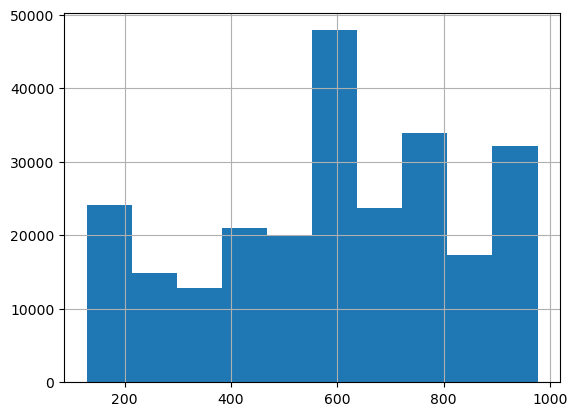

In [18]:
pre_h_df['Price'].hist()

# Cycle01
- 기본 전처리 이후 상관관계를 신경쓰지 않고 훈련 진행

In [20]:
pre_h_df.corr()['Price'].sort_values(ascending=False)[1:]

Purity       0.432581
CS           0.035166
Viscosity    0.009632
EC          -0.000571
F           -0.002041
G           -0.004815
WC          -0.014381
Density     -0.050518
pH          -0.100714
Name: Price, dtype: float64

<Axes: >

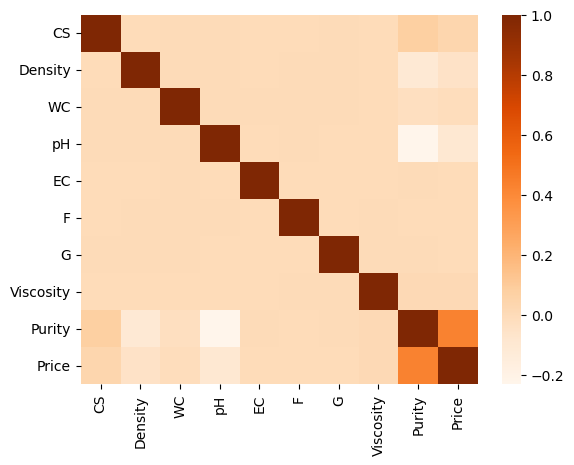

In [21]:
import seaborn as sns

corr = pre_h_df.corr()
sns.heatmap(corr, cmap= 'Oranges')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [23]:
get_vif(pre_h_df.iloc[:,:-1])

,vif_score,feature
0,5.503986,CS
1,54.791703,Density
2,23.729870,WC
3,12.799314,pH
4,100.463958,EC
5,16.612934,F
6,20.167077,G
7,6.403328,Viscosity
8,32.882128,Purity


In [25]:
from statsmodels.api import OLS

features, target = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          2.260e+05
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        01:06:55   Log-Likelihood:                     -1.6781e+06
No. Observations:              247903   AIC:                                  3.356e+06
Df Residuals:                  247894   BIC:                                  3.356e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [28]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44212.2630, RMSE: 210.2671, MSLE: 0.2226, RMSLE: 0.4718, R2: 0.1865


In [16]:
# # 비선형 회귀 모델 확인
# from sklearn.preprocessing import PolynomialFeatures

# poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# X_train, X_test, y_train, y_test = \
# train_test_split(poly_features, targets, test_size=0.2, random_state=321)

# l_r = LinearRegression()
# l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
# prediction = l_r.predict(X_test)
# get_evaluation(y_test, prediction)

MSE: 44270.6533, RMSE: 210.4059, MSLE: 0.2227, RMSLE: 0.4720, R2: 0.1854


In [33]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# X_train, X_test, y_train, y_test =\
# train_test_split(features, targets, test_size=0.2, random_state=321)

# dt_r = DecisionTreeRegressor(random_state=321)
# rd_r = RandomForestRegressor(random_state=321)
# gb_r = GradientBoostingRegressor(random_state=321)
# xgb_r = XGBRegressor(random_state=321)
# lgb_r = LGBMRegressor(random_state=321)

# models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

# for model in models:
#     model.fit(X_train, y_train)
#     prediction = model.predict(X_test)
#     print(model.__class__.__name__)
#     get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 90399.9574, RMSE: 300.6659, MSLE: 0.4443, RMSLE: 0.6666, R2: -0.6634
RandomForestRegressor
MSE: 45738.2715, RMSE: 213.8651, MSLE: 0.2243, RMSLE: 0.4736, R2: 0.1584
GradientBoostingRegressor
MSE: 44230.5875, RMSE: 210.3107, MSLE: 0.2226, RMSLE: 0.4718, R2: 0.1861
XGBRegressor
MSE: 44985.5044, RMSE: 212.0979, MSLE: 0.2247, RMSLE: 0.4741, R2: 0.1722
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1643
[LightGBM] [Info] Number of data points in the train set: 198322, number of used features: 9
[LightGBM] [Info] Start training from score 594.787957
LGBMRegressor
MSE: 44301.4085, RMSE: 210.4790, MSLE: 0.2228, RMSLE: 0.4720, R2: 0.1848


### C01
- 비선형모델을 사용했을 때 R2 Score가 낮아진 부분을 확인하여 선형 모델로 확인

# Cycle02
- 기존 범주형 데이터를 추가하여 추가 훈련

In [75]:
from sklearn.preprocessing import LabelEncoder

pre_h_df = h_df.copy()
encoder = LabelEncoder()
result = encoder.fit_transform(h_df['Pollen_analysis'])
pre_h_df['Pollen_analysis'] = result
pre_h_df

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,3,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,1,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,13,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,0,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,6,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,2,4417.74,0.97,949.32


In [64]:
pre_h_df.corr()['Price'].sort_values(ascending=False)[1:]

Purity             0.432581
Pollen_analysis    0.058498
CS                 0.035166
Viscosity          0.009632
EC                -0.000571
F                 -0.002041
G                 -0.004815
WC                -0.014381
Density           -0.050518
pH                -0.100714
Name: Price, dtype: float64

In [65]:
from statsmodels.api import OLS

features, target = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.043e+05
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        01:27:47   Log-Likelihood:                     -1.6776e+06
No. Observations:              247903   AIC:                                  3.355e+06
Df Residuals:                  247893   BIC:                                  3.355e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [67]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44070.0273, RMSE: 209.9286, MSLE: 0.2228, RMSLE: 0.4720, R2: 0.1891


# C02
- 범주형 feature를 추가하여도 큰 R2 Score에 큰 변화가 없음

# Cycle03
- 다중공선성, 상관관계를 확인하여 feature 제거 후 확인

In [68]:
columns = ['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G','Viscosity']
pre_h_df = pre_h_df.drop(labels = columns, axis = 1)
pre_h_df

,Pollen_analysis,Purity,Price
0,3,0.68,645.24
1,1,0.89,385.85
2,6,0.66,639.64
3,3,1.00,946.46
4,1,1.00,432.62
...,...,...,...
247898,13,1.00,754.98
247899,0,1.00,543.41
247900,6,0.64,615.46
247901,2,0.97,949.32


In [69]:
from statsmodels.api import OLS

features, target = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.021e+06
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        01:27:48   Log-Likelihood:                     -1.6776e+06
No. Observations:              247903   AIC:                                  3.355e+06
Df Residuals:                  247901   BIC:                                  3.355e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [71]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44062.0407, RMSE: 209.9096, MSLE: 0.2228, RMSLE: 0.4720, R2: 0.1892


## 큰 변화를 확인할 수 없음

# 차원 축소 진행


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

features, target = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

for i in range(7):
    pca = PCA(n_components=(i+1))

    pca_train = pca.fit_transform(features)

    print(pca.explained_variance_ratio_.sum(), i)

0.9999701486398526 0
0.9999825723206381 1
0.9999912310679377 2
0.9999961989139851 3
0.9999985289410077 4
0.999999644624684 5
0.9999999905686128 6


In [78]:
# 보존률
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum()) 

[9.99970149e-01 1.24236808e-05 8.65874730e-06 4.96784605e-06
 2.33002702e-06 1.11568368e-06 3.45943929e-07]
0.9999999905686128


In [101]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features, target = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

pipe = Pipeline(
    [
        ('min_max', MinMaxScaler()),
        ('l_r',LinearRegression())
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('min_max', MinMaxScaler()), ('l_r', LinearRegression())])

In [102]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44070.0273, RMSE: 209.9286, MSLE: 0.2228, RMSLE: 0.4720, R2: 0.1891


In [103]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

features, target = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

pipe = Pipeline(
    [
        ('pca', PCA(n_components=2)),
        ('lasso', Lasso(alpha=10, max_iter=10000))
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('lasso', Lasso(alpha=10, max_iter=10000))])

In [104]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 54354.1548, RMSE: 233.1398, MSLE: 0.2555, RMSLE: 0.5055, R2: -0.0002


In [105]:
pre_h_df['Price'] = np.log1p(pre_h_df['Price'])
pre_h_df

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,6.471171
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,5.958037
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6,6883.60,0.66,6.462468
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,3,7167.56,1.00,6.853785
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,1,5125.44,1.00,6.072169
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,13,8261.63,1.00,6.628015
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,0,6939.39,1.00,6.299703
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,6,4139.79,0.64,6.423993
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,2,4417.74,0.97,6.856799


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [108]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2151, RMSE: 0.4638, MSLE: 0.0044, RMSLE: 0.0666, R2: 0.1220


# R2 Score가 점점 떨어지는 이유를 모르겠음